In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


In [68]:
channels = pd.read_csv("channel_data.csv")
channels['avgViews'] = channels['View Count'] / channels['Video Count']
channels.replace([np.inf, -np.inf], np.nan, inplace=True)
channels.dropna(inplace=True)
channels

,Title,View Count,Subscriber Count,Video Count,avgViews
0,YouTube TV,16561757,369000,80,2.070220e+05
1,Talent Recap,6462549813,13000000,5478,1.179728e+06
2,Love YourSelf,475384601,1560000,1817,2.616316e+05
3,Real Engineering,461006113,4210000,185,2.491925e+06
4,Leo - Topic,35957,143,3,1.198567e+04
...,...,...,...,...,...
207,McCormick Spice,123137442,136000,359,3.430012e+05
208,Queen Radio,1260445,20700,186,6.776586e+03
209,sabtuahad,3638039,3280,76,4.786893e+04
210,Hollywood Action,56588925,208000,23,2.460388e+06


# Is Average Viewership Proportional to Subscriber Count?

,Title,View Count,Subscriber Count,Video Count,avgViews
120,Chill Hop Beats - Topic,22525,32,4517,4.986717e+00
123,ASMR Art of Sound - Topic,16730,69,964,1.735477e+01
130,Jermie,177,14,7,2.528571e+01
166,Church Extension Plan,2673,17,50,5.346000e+01
99,Garwood Borough,8621,149,114,7.562281e+01
...,...,...,...,...,...
76,Gaby Music,58356268,71400,1,5.835627e+07
18,Sia,14052258533,23100000,218,6.445990e+07
12,YoungBoy Never Broke Again,14232130537,13200000,175,8.132646e+07
149,Vlad and Niki,84981824647,110000000,656,1.295455e+08


'p-value: 0.008654830153107617'

'Largest # of Subs: 40    MrBeast\nName: Title, dtype: object'

'Largest # of Views/Video: 30    Kanye West\nName: Title, dtype: object'

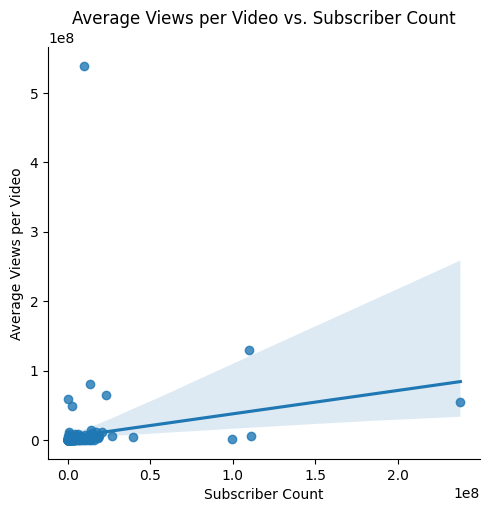

In [69]:

sns.lmplot(data=channels, x='Subscriber Count', y='avgViews')
plt.title("Average Views per Video vs. Subscriber Count")
plt.xlabel("Subscriber Count")
plt.ylabel("Average Views per Video")
channels.sort_values(by='avgViews', inplace=True)
display(channels)

result = stats.pearsonr(x=channels['Subscriber Count'], y=channels['avgViews'])
display(f"p-value: {result.pvalue}")
display(f"Largest # of Subs: {channels[channels['Subscriber Count'] == channels['Subscriber Count'].max()].Title}")
display(f"Largest # of Views/Video: {channels[channels['avgViews'] == channels['avgViews'].max()].Title}")

The plot above shows that there is a positive correlation between average viewership and subscriber count. This makes sense because the more subscribers a channel has, the more people will be regularly consuming their content, and as a result their average views per video will increase. The p-value is rather large, probably due to the extreme outliers. However, notice the channels with a low subscriber amount that have an enormous amount of views per video. These outliers are popular musicians, who unlike content creators have a small amount of videos. Each music video they post tends to go viral, and so their views per video are very high.

# Are larger youtubers better than small youtubers at getting views?

'T-test p-value: 0.06031670869392913'

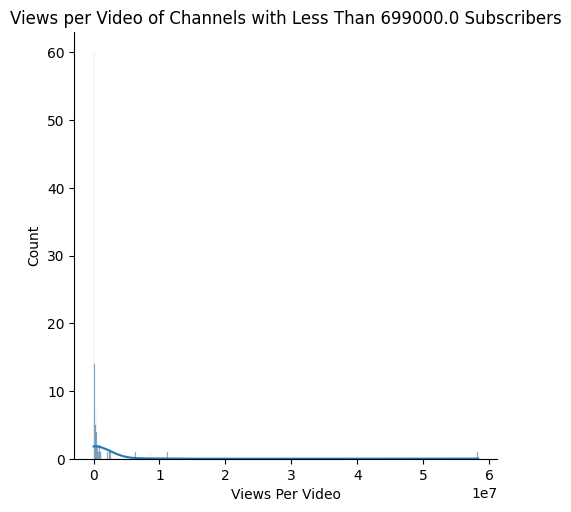

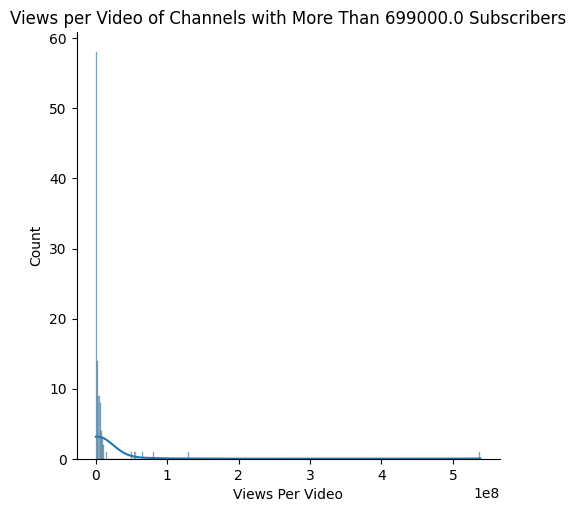

In [70]:
cutoff = channels['Subscriber Count'].median()
small = channels[channels['Subscriber Count'] < cutoff]
large = channels[channels['Subscriber Count'] >= cutoff]

sns.displot(data=small, x='avgViews', kde=True)
plt.title(f"Views per Video of Channels with Less Than {cutoff} Subscribers")
plt.xlabel("Views Per Video")
sns.displot(data=large, x='avgViews', kde=True)
plt.title(f"Views per Video of Channels with More Than {cutoff} Subscribers")
plt.xlabel("Views Per Video")


result = stats.ttest_ind(large['avgViews'],small['avgViews'])
display(f"T-test p-value: {result.pvalue}")



# Subscribers vs. Video Count

Is the number of subscribers to a youtube channel proportional to the number of videos that channel has uploaded? Determining this can help content creators formulate a strategy to maximize channel growth. 

'Corellation coefficient: 0.08899168735733873'

'p-value: 0.19897940975506395'

'Pearson Test for Video Count < 10000'

'Corellation coefficient: 0.16012151981694409'

'p-value: 0.02573206897936613'

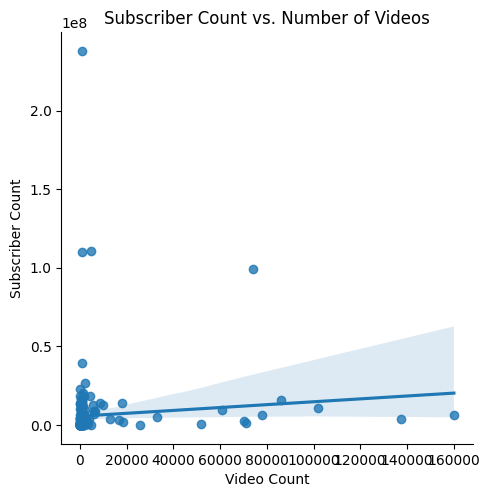

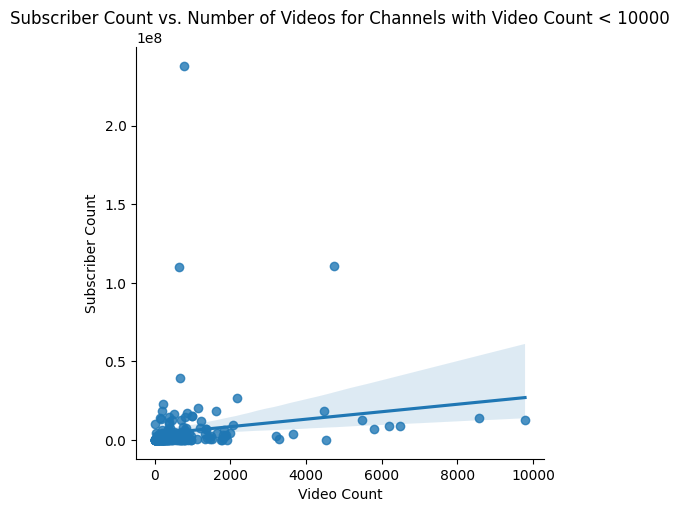

In [71]:
sns.lmplot(data=channels, x="Video Count", y="Subscriber Count",)
plt.title("Subscriber Count vs. Number of Videos")
result = stats.pearsonr(x=channels['Video Count'], y=channels["Subscriber Count"])

display(f"Corellation coefficient: {result.statistic}")
display(f"p-value: {result.pvalue}")
